# PyNEST - First Steps

**Modeling networks of spiking neurons using NEST**

**EITN Fall School 2024, 17.10.2024**

**[Barna Zajzon](mailto:b.zajzon@fz-juelich.de)**

This notebook guides through your first steps using NEST. It shows
* how to get help
* how to create and simulate a single neuron
* how to visualize the output

Essentially, this is a reproduction of the 'Hello World!' notebook with added explanations. 

For more details see [part 1 of the official PyNEST tutorial](https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html).

In [1]:
import nest # import NEST module
from matplotlib import pyplot as plt
import numpy as np


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.node_models
# nest.synapse_models
# nest.Models()

('volume_transmitter',
 'weight_recorder',
 'ac_generator',
 'dc_generator',
 'gamma_sup_generator',
 'mip_generator',
 'noise_generator',
 'inhomogeneous_poisson_generator',
 'poisson_generator',
 'poisson_generator_ps',
 'ppd_sup_generator',
 'pulsepacket_generator',
 'sinusoidal_poisson_generator',
 'spike_generator',
 'step_current_generator',
 'step_rate_generator',
 'sinusoidal_gamma_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_astro',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_exp',
 'aeif_psc_delta',
 'astrocyte_lr_1994',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'glif_cond',
 'hh_cond_exp_traub',
 'hh_cond_beta_gap_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'iaf_chxk_2008',
 'iaf_cond_alpha',
 'iaf_cond_alpha_mc',
 'iaf_cond_beta',
 'iaf_cond_exp',
 'iaf_cond_exp_sfa_rr',
 'siegert_neuron',
 'amat2_psc_exp',
 'cm_default',
 'eprop_iaf_bsshslm_2020',
 'eprop_iaf_adapt_bsshslm_2020

## Getting help

In [3]:
# information about functions with Python's help() ...
help(nest.Models)

Help on function Models in module nest.lib.hl_api_models:

Models(mtype='all', sel=None)
    Return a tuple of neuron, device, or synapse model names.
    
    Parameters
    ----------
    mtype : str, optional
        Use ``mtype='nodes'`` to only get neuron and device models,
        or ``mtype='synapses'`` to only get synapse models.
    sel : str, optional
        Filter results and only return models containing ``sel``.
    
    Returns
    -------
    tuple
        Available model names, sorted by name
    
    Raises
    ------
    ValueError
        Description
    
    Notes
    -----
    - Synapse model names ending in ``_hpc`` require less memory because of
      thread-local indices for target neuron IDs and fixed ``rport``\s of 0.
    - Synapse model names ending in ``_lbl`` allow to assign an integer label
      (``synapse_label``) to each individual synapse, at the cost of increased
      memory requirements.



In [4]:
# ... or IPython's question mark
nest.Models?

## Creating a neuron

In [4]:
# before creating a new network,
# reset the simulation kernel / remove all nodes
nest.ResetKernel()

In [5]:
# create the neuron
neuron = nest.Create('iaf_psc_exp')

In [6]:
# investigate the neuron

# Create() just returns a list node collection yielding the size and the first GID.
# One can add node collections to create larger populations
neuron

NodeCollection(metadata=None, model=iaf_psc_exp, size=1, first=1)

In [7]:
# current dynamical state/parameters of the neuron
# note that the membrane voltage is at -70 mV

neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'delta': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_exp',
 'model_id': 54,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'rho': 0.01,
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

## Creating a spike generator

In [8]:
# create a spike generator
spikegenerator = nest.Create('spike_generator')

In [9]:
# check out 'spike_times' in its parameters
spikegenerator.get()

{'allow_offgrid_times': False,
 'element_type': 'stimulator',
 'frozen': False,
 'global_id': 2,
 'label': '',
 'local': True,
 'model': 'spike_generator',
 'model_id': 11,
 'node_uses_wfr': False,
 'origin': 0.0,
 'precise_times': False,
 'shift_now_spikes': False,
 'spike_multiplicities': array([], dtype=int64),
 'spike_times': array([], dtype=float64),
 'spike_weights': array([], dtype=float64),
 'start': 0.0,
 'stimulus_source': '0',
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': -1,
 'vp': 0}

In [10]:
# set the spike times at 10 and 50 ms
spikegenerator.spike_times = [10., 50., 55., 63., 65., 68., 100., 110., 115., 120., 122., 125.]

## Creating a voltmeter

In [11]:
# create a voltmeter for recording
voltmeter = nest.Create('voltmeter')

In [12]:
# investigate the voltmeter (check out the GID)
voltmeter

NodeCollection(metadata=None, model=voltmeter, size=1, first=3)

In [14]:
# see that it records membrane voltage, senders, times
voltmeter.get()

{'element_type': 'recorder',
 'events': {'senders': array([], dtype=int64),
  'times': array([], dtype=float64)},
 'frozen': False,
 'global_id': 3,
 'interval': 1.0,
 'label': '',
 'local': True,
 'model': 'voltmeter',
 'model_id': 93,
 'n_events': 0,
 'node_uses_wfr': False,
 'offset': 0.0,
 'origin': 0.0,
 'record_from': ('V_m',),
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': -1,
 'time_in_steps': False,
 'vp': 0}

In [16]:
# set recording interval to 0.1 ms
voltmeter.interval = 0.1
voltmeter.interval

0.1

## Creating a spike detector

In [17]:
# create a spike detector for recording
spikerecorder = nest.Create('spike_recorder')

In [18]:
# investigate the voltmeter
spikerecorder

NodeCollection(metadata=None, model=spike_recorder, size=1, first=4)

In [19]:
# see that it records membrane voltage, senders, times
spikerecorder.get()

{'element_type': 'recorder',
 'events': {'senders': array([], dtype=int64),
  'times': array([], dtype=float64)},
 'frozen': False,
 'global_id': 4,
 'label': '',
 'local': True,
 'model': 'spike_recorder',
 'model_id': 94,
 'n_events': 0,
 'node_uses_wfr': False,
 'origin': 0.0,
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': -1,
 'time_in_steps': False,
 'vp': 0}

## Connecting

In [20]:
# investigate Connect() function
nest.Connect?

Signature:
nest.Connect(
    pre,
    post,
    conn_spec=None,
    syn_spec=None,
    return_synapsecollection=False,
)
Docstring:
Connect `pre` nodes to `post` nodes.

Nodes in `pre` and `post` are connected using the specified connectivity
(`all-to-all` by default) and synapse type (:cpp:class:`static_synapse <nest::static_synapse>` by default).
Details depend on the connectivity rule.

Lists of synapse models and connection rules are available as
``nest.synapse_models`` and ``nest.connection_rules``, respectively.

Parameters
----------
pre : NodeCollection (or array-like object)
    Presynaptic nodes, as object representing the IDs of the nodes
post : NodeCollection (or array-like object)
    Postsynaptic nodes, as object representing the IDs of the nodes
conn_spec : str or dict, optional
    Specifies connectivity rule, see below
syn_spec : str or dict, optional
    Specifies synapse model, see below
return_synapsecollection: bool
    Specifies whether or not we should return a :

In [21]:
# connect spike generator and voltmeter to the neuron
nest.Connect(spikegenerator, neuron, syn_spec={'weight': 1e3})

In [22]:
nest.Connect(voltmeter, neuron)
nest.Connect(neuron, spikerecorder) # note the changed order

## Simulating

In [23]:
# run simulation for 100 ms
nest.Simulate(200.)


Oct 11 08:30:02 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Oct 11 08:30:02 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 11 08:30:02 SimulationManager::run [Info]: 
    Simulation finished.


In [24]:
# look at nest's KernelStatus:
# network_size (root node, neuron, spike generator, voltmeter)
# num_connections
# time (simulation duration)
nest.GetKernelStatus()

{'adaptive_target_buffers': True,
 'biological_time': 200.0,
 'buffer_size_spike_data': 2,
 'buffer_size_target_data': 2,
 'connection_rules': ('pairwise_poisson',
  'one_to_one',
  'all_to_all',
  'fixed_indegree',
  'fixed_outdegree',
  'pairwise_bernoulli',
  'tripartite_bernoulli_with_pool',
  'symmetric_pairwise_bernoulli',
  'fixed_total_number'),
 'data_path': '',
 'data_prefix': '',
 'dict_miss_is_error': True,
 'eprop_learning_window': 1000.0,
 'eprop_reset_neurons_on_update': True,
 'eprop_update_interval': 1000.0,
 'growth_curves': ('gaussian', 'linear', 'sigmoid'),
 'growth_factor_buffer_spike_data': 1.5,
 'growth_factor_buffer_target_data': 1.5,
 'keep_source_table': True,
 'local_num_threads': 1,
 'local_spike_counter': 2,
 'max_buffer_size_target_data': 16777216,
 'max_delay': 1.0,
 'max_num_syn_models': 512,
 'max_update_time': 7.999999999999998e-06,
 'min_delay': 1.0,
 'min_update_time': 0.0,
 'modules': (),
 'ms_per_tic': 0.001,
 'network_size': 4,
 'node_models': ('v

In [25]:
# note that voltmeter has recorded 99 events
voltmeter.get()

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, ..., 1, 1, 1]),
  'times': array([1.000e-01, 2.000e-01, 3.000e-01, ..., 1.988e+02, 1.989e+02,
         1.990e+02]),
  'V_m': array([-70.        , -70.        , -70.        , ..., -69.99047752,
         -69.99057227, -69.99066608])},
 'frozen': False,
 'global_id': 3,
 'interval': 0.1,
 'label': '',
 'local': True,
 'model': 'voltmeter',
 'model_id': 93,
 'n_events': 1990,
 'node_uses_wfr': False,
 'offset': 0.0,
 'origin': 0.0,
 'record_from': ('V_m',),
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 2,
 'time_in_steps': False,
 'vp': 0}

In [28]:
# read out recording time and voltage from voltmeter
times = voltmeter.get('events')['times']
voltages = voltmeter.get('events')['V_m']

In [26]:
# now have a look at the spikedetector
spikerecorder.get()

{'element_type': 'recorder',
 'events': {'senders': array([1, 1]), 'times': array([ 69.1, 123.5])},
 'frozen': False,
 'global_id': 4,
 'label': '',
 'local': True,
 'model': 'spike_recorder',
 'model_id': 56,
 'n_events': 2,
 'node_uses_wfr': False,
 'origin': 0.0,
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 3,
 'time_in_steps': False,
 'vp': 0}

In [26]:
spike_times = spikerecorder.events['times']

## Plotting

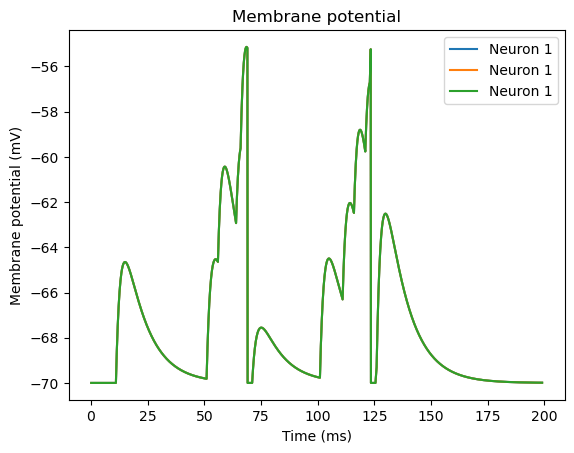

In [31]:
%matplotlib inline
# plot results
# units can be found in documentation
plt.plot(times, voltages, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential')
plt.legend()
plt.show()

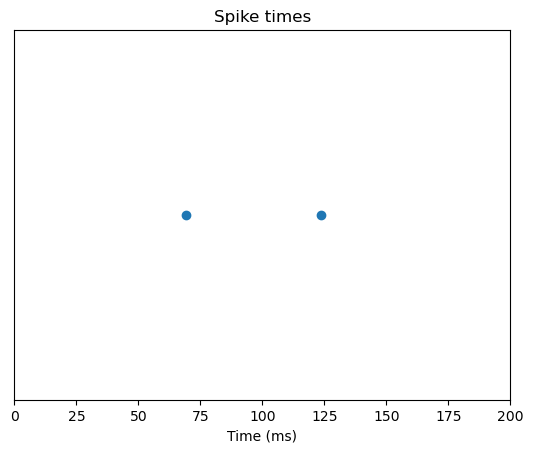

In [32]:
plt.plot(spike_times, np.zeros(len(spike_times)), marker = 'o', linestyle = ' ' )
plt.xlabel('Time (ms)')
plt.xlim(0,200)
plt.yticks([])
plt.title('Spike times')
plt.show()

In [33]:
# create the same plot with NEST's build-in plotting function
import nest.voltage_trace

[[<matplotlib.lines.Line2D at 0x7fbf4a619e20>]]

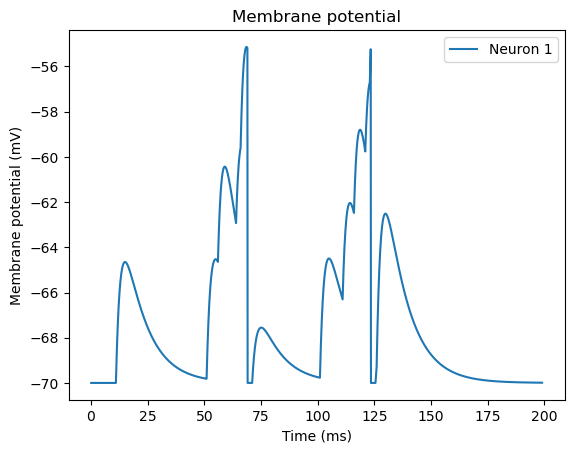

In [34]:
nest.voltage_trace.from_device(voltmeter) 

## Full network example


Oct 11 08:32:28 NodeManager::prepare_nodes [Info]: 
    Preparing 4001 nodes for simulation.

Oct 11 08:32:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4001
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 11 08:32:28 SimulationManager::run [Info]: 
    Simulation finished.


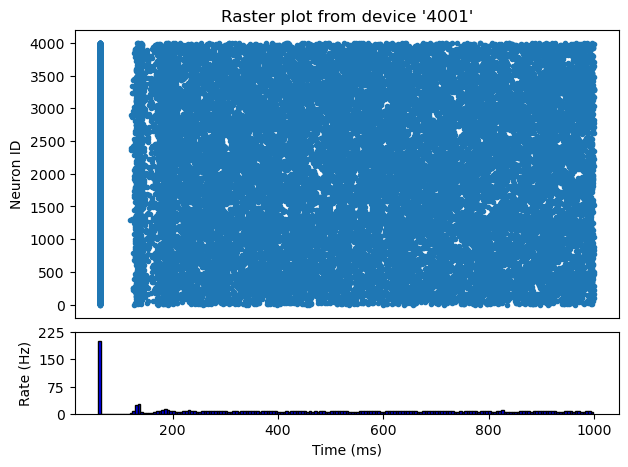

In [36]:
import nest.raster_plot
%matplotlib inline
from matplotlib import pyplot as plt

neuron_params = {'tau_m': 20.,
                 'tau_syn_ex': 5.,
                 'tau_syn_in': 20.,
                 'E_L': -49.,
                 'V_th': -50.,
                 'V_reset': -60.}
num_neurons = 4000
num_neurons_ex = int(num_neurons * 0.8)
num_neurons_in = num_neurons - num_neurons_ex

weights_ex = 6 * 0.27
weights_in = -2 * 4.5

conn_prob = 0.02

nest.ResetKernel()

neurons = nest.Create('iaf_psc_exp', num_neurons, params=neuron_params)

spike_recorder = nest.Create('spike_recorder',
                             params={'start': 0.,
                                     'stop': 1000.})

neurons_ex = neurons[:num_neurons_ex]
neurons_in = neurons[num_neurons_ex:]

nest.Connect(neurons_ex, neurons,
             conn_spec={'rule': 'pairwise_bernoulli', 'p': conn_prob},
             syn_spec={'weight': weights_ex, 'delay': 1.5})
nest.Connect(neurons_in, neurons,
             conn_spec={'rule': 'pairwise_bernoulli', 'p': conn_prob},
             syn_spec={'weight': weights_in, 'delay': 1.5})

nest.Connect(neurons, spike_recorder)

nest.Simulate(1000.)

nest.raster_plot.from_device(spike_recorder, hist=True)
plt.show()

## Now it's your turn!

* Check out the [official PyNEST tutorials](https://nest-simulator.readthedocs.io/en/latest/tutorials/index.html), in particular
  * part 1: Neurons and simple neural networks
  * part 2: Populations of neurons
* Create a small network of all-to-all connect neurons and couple them with strong synapses and different delays (see [here](https://nest-simulator.readthedocs.io/en/latest/guides/random_numbers.html?highlight=random%20number%20generators#randomize_connection_parameters), in particular Randomize connection parameters), drive the network to spiking with neuron parameter `I_e`. What happens if you use excitatory, what happens if you use inhibitory synapses (if they are sufficiently strong)